<a href="https://colab.research.google.com/github/Salieri9527/2021DSPrescreen/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **109306012 資管二 曾昭銘**

In [62]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np

# **Q1**

In [111]:
def objective1(t):
    revenue = 4 * (1 - 0.75**t)
    salvage = 1 / (1 + t)
    benefit = revenue + salvage
    return np.sum(-benefit) #Scipy only has minimize function 

In [112]:
t0 = 0 ## initial value

res1 = opt.minimize(objective1, t0, method = 'Nelder-Mead') 

In [113]:
res1

 final_simplex: (array([[22.408875 ],
       [22.4088125]]), array([-4.03637542, -4.03637542]))
           fun: -4.036375420714669
       message: 'Optimization terminated successfully.'
          nfev: 68
           nit: 34
        status: 0
       success: True
             x: array([22.408875])

# **Q2**

In [181]:
ER = np.array([14.67, 33.20, 59.36, 11.91])
SD = np.array([12.17, 24.47, 37.72, 8.66])
CORR = np.array([0.158, 0.078, 0.579, 0.241, 0.302, 0.282])
COE = np.array([2*SD[0]*SD[1]*CORR[0], 2*SD[0]*SD[2]*CORR[1], 2*SD[0]*SD[3]*CORR[2], 2*SD[1]*SD[2]*CORR[3], 2*SD[1]*SD[3]*CORR[4], 2*SD[2]*SD[3]*CORR[5]])


# **(a)**

In [198]:
def objective(g):
    return np.sqrt(SD[0]**2 * g[0]**2 + SD[1]**2 * g[1]**2 + SD[2]**2 * g[2]**2 + SD[3]**2 * g[3]**2 + COE[0]*g[0]*g[1] + COE[1]*g[0]*g[2] + COE[2]*g[0]*g[3] + COE[3]*g[1]*g[2] + COE[4]*g[1]*g[3] + COE[5]*g[2]*g[3])
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return ER[0]*g[0] + ER[1]*g[1] + ER[2]*g[2] + ER[3]*g[3]
def constr3(g):
    return g

In [199]:
x0 = np.array([0, 0, 0, 0]) ## initial value
cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=1)
cons2 = opt.NonlinearConstraint(constr2, ub= np.inf, lb=30)
cons3 = opt.NonlinearConstraint(constr3, ub= np.inf, lb=0)
resA = opt.minimize(objective, x0,constraints=[cons1, cons2, cons3])

In [200]:
resA

     fun: 14.302200659896544
     jac: array([ 6.33712745, 15.96488595, 29.55696511,  4.90261936])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.45045002, 0.24954756, 0.24307461, 0.05692781])

# **(b)**

In [201]:
def objective(g):
    return -(ER[0]*g[0] + ER[1]*g[1] + ER[2]*g[2] + ER[3]*g[3]) #Scipy only has minimize function 
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return np.sqrt(SD[0]**2 * g[0]**2 + SD[1]**2 * g[1]**2 + SD[2]**2 * g[2]**2 + SD[3]**2 * g[3]**2 + COE[0]*g[0]*g[1] + COE[1]*g[0]*g[2] + COE[2]*g[0]*g[3] + COE[3]*g[1]*g[2] + COE[4]*g[1]*g[3] + COE[5]*g[2]*g[3])
def constr3(g):
    return g

In [202]:
x0 = np.array([0, 0, 0, 0]) ## initial value
cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=1)
cons2 = opt.NonlinearConstraint(constr2, ub=10, lb=0)
cons3 = opt.NonlinearConstraint(constr3, ub= np.inf, lb=0)
resB = opt.minimize(objective, x0,constraints=[cons1, cons2, cons3])

In [203]:
resB

     fun: -20.33222487211853
     jac: array([-14.67000008, -33.19999981, -59.3599999 , -11.90999985])
 message: 'Optimization terminated successfully'
    nfev: 69
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.27817563, 0.12657315, 0.10452514, 0.49072608])

# **(c)**

In [245]:
RER = np.array(range(0, 31))
OSD = np.zeros(len(RER))

In [246]:
def objective(g):
    return np.sqrt(SD[0]**2 * g[0]**2 + SD[1]**2 * g[1]**2 + SD[2]**2 * g[2]**2 + SD[3]**2 * g[3]**2 + COE[0]*g[0]*g[1] + COE[1]*g[0]*g[2] + COE[2]*g[0]*g[3] + COE[3]*g[1]*g[2] + COE[4]*g[1]*g[3] + COE[5]*g[2]*g[3])
def constr1(g):
    return g[0] + g[1] + g[2] + g[3]
def constr2(g):
    return ER[0]*g[0] + ER[1]*g[1] + ER[2]*g[2] + ER[3]*g[3]
def constr3(g):
    return g

In [247]:
for i in range(len(RER)):
  x0 = np.array([0, 0, 0, 0]) ## initial value
  cons1 = opt.NonlinearConstraint(constr1, ub=1, lb=1)
  cons2 = opt.NonlinearConstraint(constr2, ub= np.inf, lb=RER[i])
  cons3 = opt.NonlinearConstraint(constr3, ub= np.inf, lb=0)
  resC = opt.minimize(objective, x0,constraints=[cons1, cons2, cons3])
  OSD[i] = round(resC.fun, 4)

In [248]:
resC

     fun: 14.302200659896544
     jac: array([ 6.33712745, 15.96488595, 29.55696511,  4.90261936])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.45045002, 0.24954756, 0.24307461, 0.05692781])

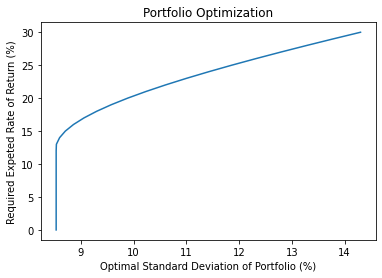

RER        OSD       
0          8.5338    
1          8.5338    
2          8.5338    
3          8.5338    
4          8.5338    
5          8.5338    
6          8.5338    
7          8.5338    
8          8.5338    
9          8.5338    
10         8.5338    
11         8.5338    
12         8.5338    
13         8.5381    
14         8.599     
15         8.7078    
16         8.8626    
17         9.061     
18         9.3004    
19         9.5775    
20         9.8893    
21         10.2326   
22         10.6042   
23         11.0014   
24         11.4215   
25         11.862    
26         12.3208   
27         12.7958   
28         13.2854   
29         13.788    
30         14.3022   


In [250]:
#Plot the expected profits from each Q candidates
plt.plot(OSD, RER)
plt.xlabel("Optimal Standard Deviation of Portfolio (%)")
plt.ylabel("Required Expeted Rate of Return (%)")
plt.title("Portfolio Optimization")
plt.show()

print ("{:<10} {:<10}".format('RER','OSD'))
for i in range(len(RER)):
   print ("{:<10} {:<10}".format(RER[i], OSD[i]))